In [188]:
import numpy as np
from urllib.request import urlopen
import json
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
%matplotlib inline

In [146]:
url = "https://api.rated.network/v0/eth/operators?window=7d&idType=depositAddress&from=10000&size=1000"

In [147]:
response = urlopen(url)

In [148]:
data_json = json.loads(response.read())

In [149]:
print(len(data_json['data']))

1000


In [64]:
validatorCounts = []

In [150]:
for i in range(1000):
    validatorCounts.append(data_json['data'][i:i+1][0].get('validatorCount'))
    #print(data_json['data'][i:i+1][0].get('id'),data_json['data'][i:i+1][0].get('validatorCount'))

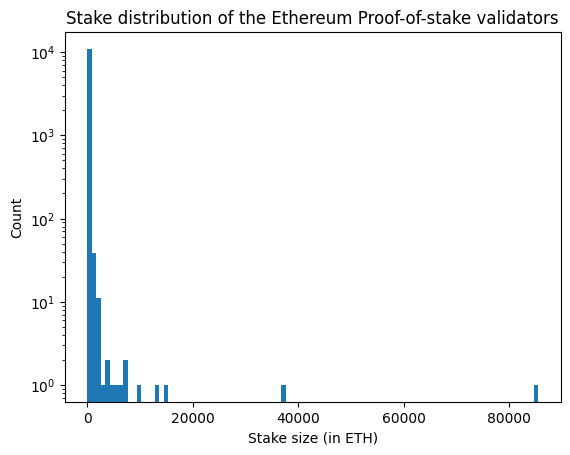

In [151]:
plt.hist(validatorCounts, bins=100, density=False)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Stake size (in ETH)')
plt.ylabel('Count')
plt.title('Stake distribution of the Ethereum Proof-of-stake validators')
plt.savefig('figures/stakeDistribution.pdf')
plt.show()

In [152]:
len(validatorCounts)
np.array(validatorCounts).dump(open('figures/validatorCounts.npy', 'wb'))

In [160]:
sendingProbabilities = []
for i in range(len(validatorCounts)):
    prob = validatorCounts[i]/sum(validatorCounts)
    sendingProbabilities.append(prob)
np.array(validatorCounts).dump(open('figures/sendingProbabilities.npy', 'wb'))

TypeError: 'allow_pickle' is an invalid keyword argument for open()

In [185]:
pdf = np.load(open('figures/sendingProbabilities.npy', 'rb'), allow_pickle=True)

In [163]:
count, bins_count = np.histogram(validatorCounts, bins=100)

In [186]:
len(pdf)
print(pdf[:20])

[85522 37284 14619 12890  9976  7639  7235  6338  5200  4943  3560  3501
  3000  2500  2435  2075  1975  1965  1868  1842]


In [187]:
cdf = np.cumsum(pdf)
cdf = cdf/np.sum(pdf)
pdf = pdf/np.sum(pdf)
print(pdf[:10])

[0.21599301 0.09416388 0.03692151 0.03255478 0.02519523 0.01929294
 0.0182726  0.01600715 0.01313304 0.01248396]


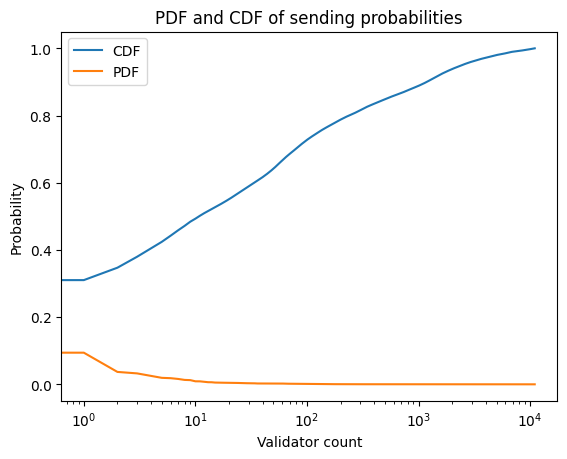

In [184]:
# plotting PDF and CDF
#plt.plot(pdf, color="red", label="PDF")
plt.plot(cdf, label="CDF")
plt.plot(pdf, label="PDF")
plt.xscale('log')
plt.legend()
plt.xlabel('Validator count')
plt.ylabel('Probability')
plt.title('PDF and CDF of sending probabilities')
plt.savefig('figures/pdfVScdfSendingProbabilities.pdf')
plt.show()

In [189]:
G=nx.Graph()

In [199]:
file1 = open('figures/goerliTestnetTopology.txt', 'r')
Lines = file1.readlines()
  
count = 0
# Strips the newline character
for line in Lines:
    count += 1
    myLine = line.strip()
    firstNode = int(myLine[4:4+myLine[4:].find(' ')])
    secondNode = int(myLine[4+myLine[4:].find(' ')+12:])
    if firstNode not in G.nodes:
        G.add_node(firstNode)
    if secondNode not in G.nodes:
        G.add_node(secondNode)
    G.add_edge(firstNode, secondNode)
nx.write_gpickle(G, "figures/goerliTopology.gpickle")